In [15]:
import nibabel as nib
from nilearn import plotting as niplt
import numpy as np
%matplotlib inline

In [2]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/0.6/datasets/db_v6_topics-60.pkl")

In [3]:
## Input masks to combine
include_files = ['../masks/LFC/FP.nii.gz' , '../masks/LFC/IFG-pt.nii.gz' , '../masks/LFC/IFGo.nii.gz' , '../masks/LFC/MFG.nii.gz' , '../masks/LFC/SFG.nii.gz']

In [3]:
include_nib = [nib.load(f) for f in include_files]

IOError: [Errno 2] No such file or directory: '../masks/LFC/FP.nii.gz'

In [ ]:
# Greater than 30%
include = [f.get_data() > 0 for f in include_nib]

In [ ]:
## Join all of then
union_include = (include[0] | include[1] | include[2] | include[3] | include[4])

In [ ]:
## Masks to exclude
exclude = [nib.load('../masks/new_medial_fc_30.nii.gz').get_data(), nib.load('../masks/LFC/OFC.nii.gz').get_data() > 30,
          nib.load('../masks/LFC/SMA.nii.gz').get_data() > 10, nib.load('../masks/LFC/ParaCing.nii.gz').get_data() > 10]

In [ ]:
## Exclude less than 30% GM
grey_exclude = [nib.load('../masks/LFC/RCC.nii.gz').get_data(), nib.load('../masks/LFC/LCC.nii.gz').get_data()]

In [4]:
## Remove those voxels
for e in exclude:
    union_include[e > 0] = False

NameError: name 'exclude' is not defined

In [5]:
union_include[((grey_exclude[0] < 30) & (grey_exclude[1] <30))] = False

NameError: name 'union_include' is not defined

In [6]:
## Remove anthing with chance of being paracingulate or juxtapositional

In [7]:
LFC_vox = nib.Nifti1Image(union_include, include_nib[0].get_affine(), include_nib[0].get_header())

NameError: name 'union_include' is not defined

In [8]:
nib.save(LFC_vox, '../masks/LFC/LFC.nii.gz')

NameError: name 'LFC_vox' is not defined

niplt.plot_roi(LFC_vox)

## Create MFC

In [3]:
ref = nib.load('../masks/HO_ROIs/JLC.nii.gz')
cortex = nib.load('test_80studymask.nii')
 

IOError: [Errno 2] No such file or directory: 'test_80studymask.nii'

In [4]:
mask = ((np.abs(i) < 7) & (j > 50) & (k > 22)).astype('int') * cortex.get_data() 
mask = nib.nifti1.Nifti1Image(mask, ref.get_affine(), ref.get_header())

NameError: name 'i' is not defined

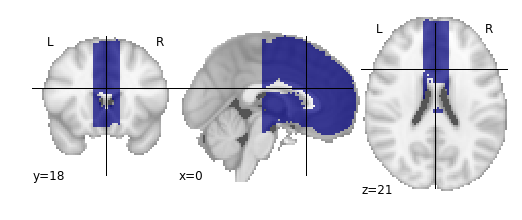

In [5]:
niplt.plot_roi(mask)

In [8]:
i, j, k = np.meshgrid(*map(np.arange, mask.get_data().shape), indexing='ij')

In [22]:
left_data = mask.get_data().copy()

In [23]:
left_data[i > (i.max() / 2)] = 0

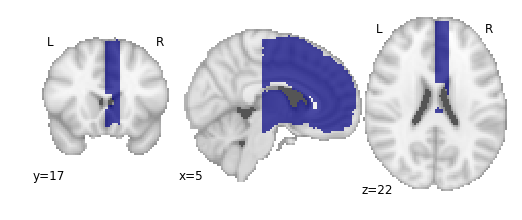

In [26]:
niplt.plot_roi(nib.nifti1.Nifti1Image(mask_data, mask.get_affine(), mask.get_header()), draw_cross=False)

In [29]:
ns_mask = mask.get_data().copy()

In [20]:
nib.save(mask, '../masks/HO_ROIs/MFC/MNI_MFC_30.nii.gz')

### Cortex mask

In [4]:
cortex = nib.load('../masks/HO_ROIs/cerbcort.nii.gz')

In [13]:
cortex_30 = nib.Nifti1Image((cortex.get_data() > 30).astype('int'), dataset.masker.get_header().get_best_affine())

In [16]:
nib.save(cortex_30, '../masks/HO_ROIs/cortex_30.nii.gz')

In [17]:
from neurosynth.analysis.cluster import Clusterable
roi = Clusterable(dataset, '../masks/HO_ROIs/cortex_30.nii.gz', min_studies=100)

In [18]:
roi.data.shape

(112358, 11406)

## LFC MNI Frontal Cortex mask

Includes: MNI Frontal Cortex @ 30%

Mask excludes within 12mm of center line
AAL OFC regions
HO orbital cortex
HO < 30% cortex

In [9]:
from nibabel.affines import apply_affine

In [206]:
from nilearn import datasets
aal = datasets.fetch_atlas_aal()
HO = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')

In [207]:
HO_dict = dict(zip(HO.labels, range(0, HO.labels.shape[0]+1)))

In [208]:
aal_nib = nib.load(aal.regions).get_data()
ho_nib = nib.load(HO.maps).get_data()

In [209]:
# Excluee AAL OFC gyri
exclude = ['Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R']
exclude = [int(i) for i, label in aal.labels.iteritems() if label in exclude]

In [210]:
OFC_mask = np.in1d(aal_nib, np.array(exclude)).astype('int').reshape(aal_nib.shape)

In [211]:
FOC_mask = (ho_nib[:, :, :, HO_dict['Frontal Operculum Cortex']] > 30).astype('int')

In [212]:
## Exclude 30% Cereb Cortex (to align w/ HO more)
cortex_30 = nib.load('../masks/HO_ROIs/cortex_30.nii.gz')

In [5]:
FC_mask = nib.load('../masks/HO_ROIs/MNI_FL_1p.nii.gz')

i, j, k = np.meshgrid(*map(np.arange, FC_mask.get_data().shape), indexing='ij')

In [6]:
niplt.plot_roi(nib.Nifti1Image(OFC_mask, affine=FC_mask.get_affine()), display_mode='z')

NameError: name 'OFC_mask' is not defined

In [7]:
niplt.plot_roi(nib.Nifti1Image(FOC_mask, affine=FC_mask.get_affine()), display_mode='z')

NameError: name 'FOC_mask' is not defined

In [10]:
X_l = apply_affine(np.linalg.inv(FC_mask.get_affine()), [-14, 0, 0])[0]
X_r = apply_affine(np.linalg.inv(FC_mask.get_affine()), [14, 0, 0])[0]
Z = apply_affine(np.linalg.inv(FC_mask.get_affine()), [0, 0, -16])[2]

In [11]:
## Exclude medial surface
FC_mask.get_data()[
    np.where((i <= X_l) & 
             (i >= X_r))] = 0
## Exclude very ventral surface
FC_mask.get_data()[
    np.where(k <= Z)] = 0

FC_mask.get_data()[FC_mask.get_data() < 1] = 0

FC_mask.get_data()[FC_mask.get_data() >= 1] = 1

In [12]:
Z

28.0

In [13]:
FC_mask.get_data()[OFC_mask == 1] = 0
FC_mask.get_data()[FOC_mask == 1] = 0

NameError: name 'OFC_mask' is not defined

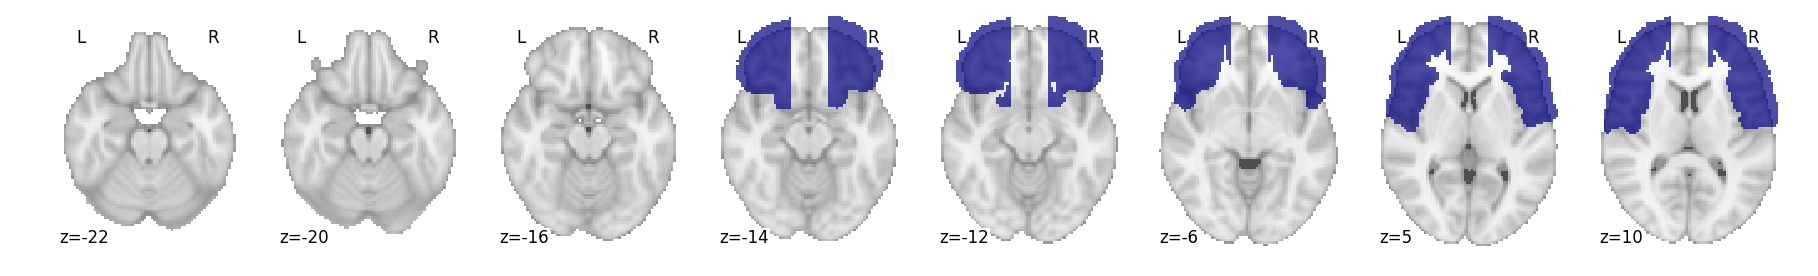

In [16]:
niplt.plot_roi(FC_mask, display_mode='z', cut_coords=[-22, -20, -16, -14, -12, 10, -6, 5])

In [221]:
nib.save(FC_mask, '../masks/LFC_MNI_noMedialOFC_FOC_1p.nii.gz')